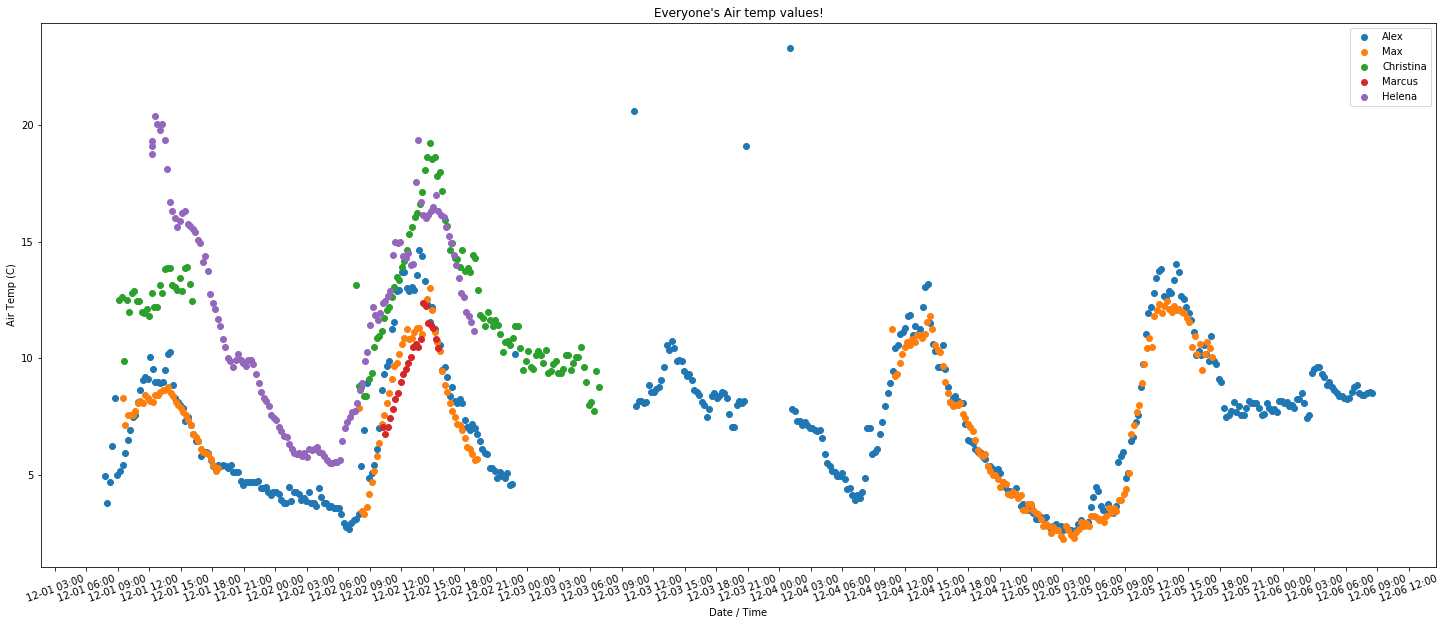

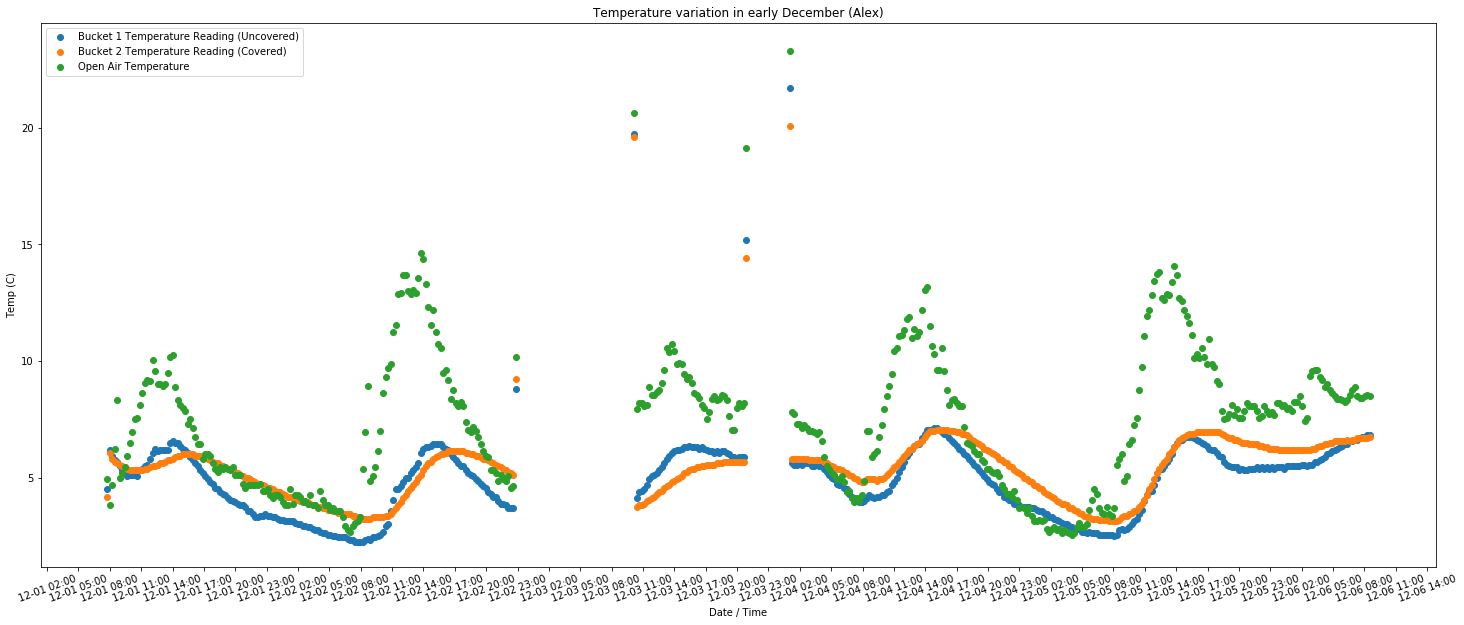

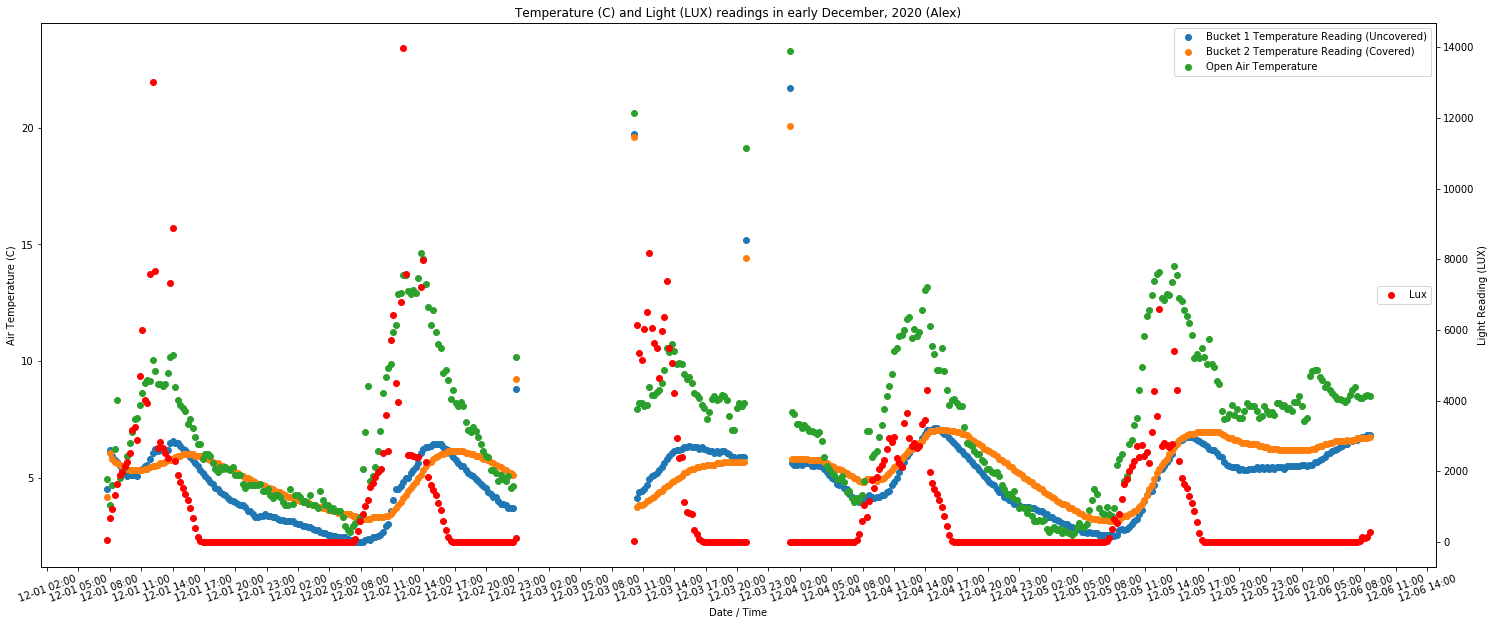

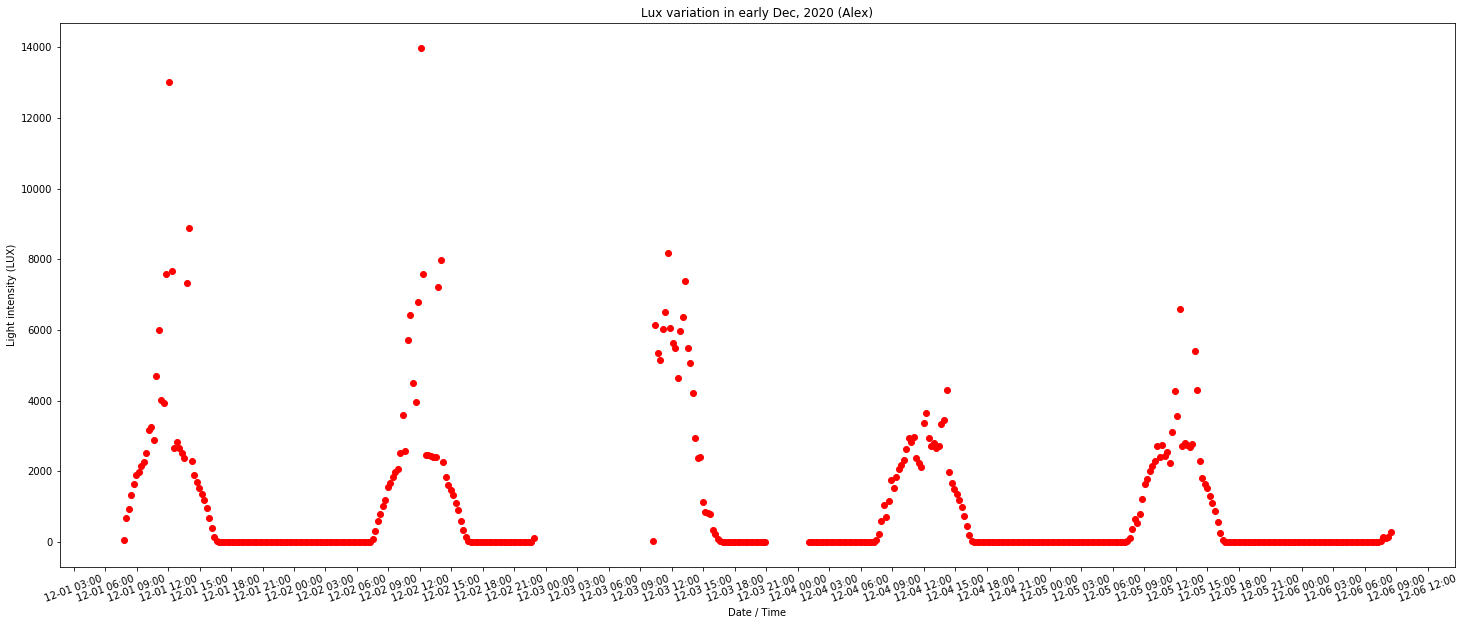

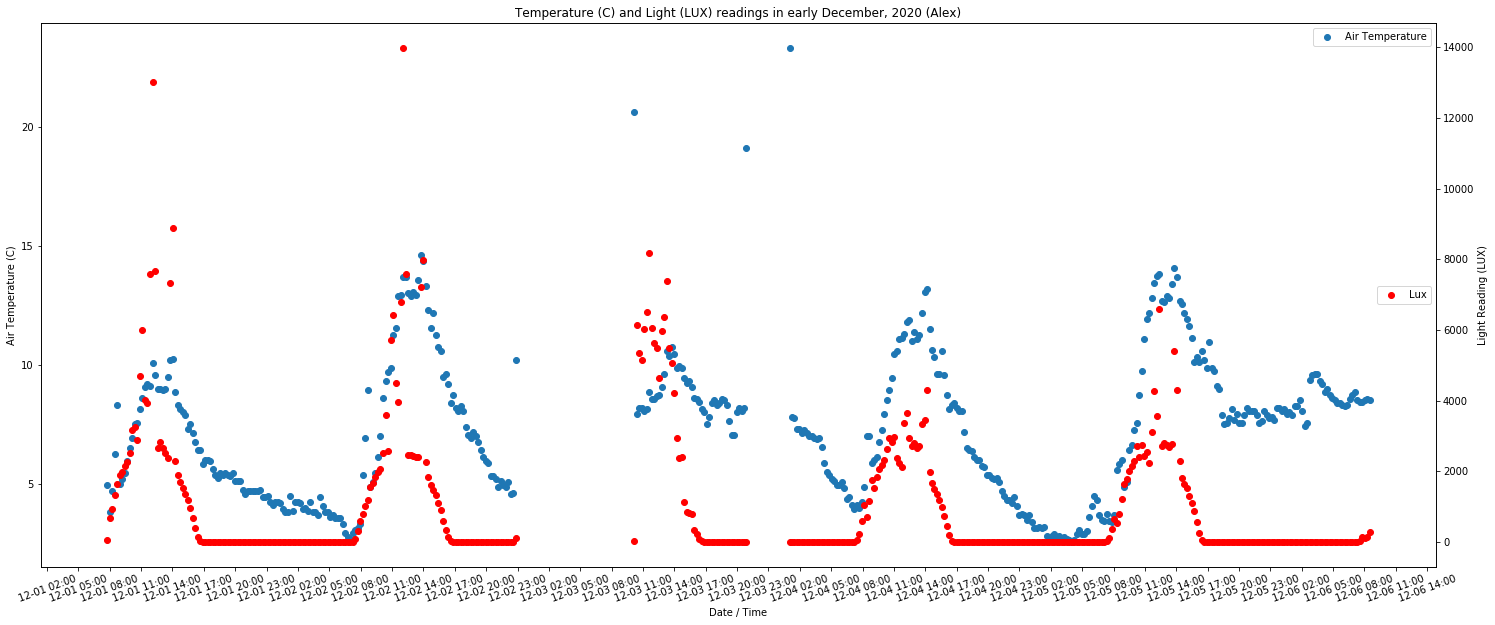

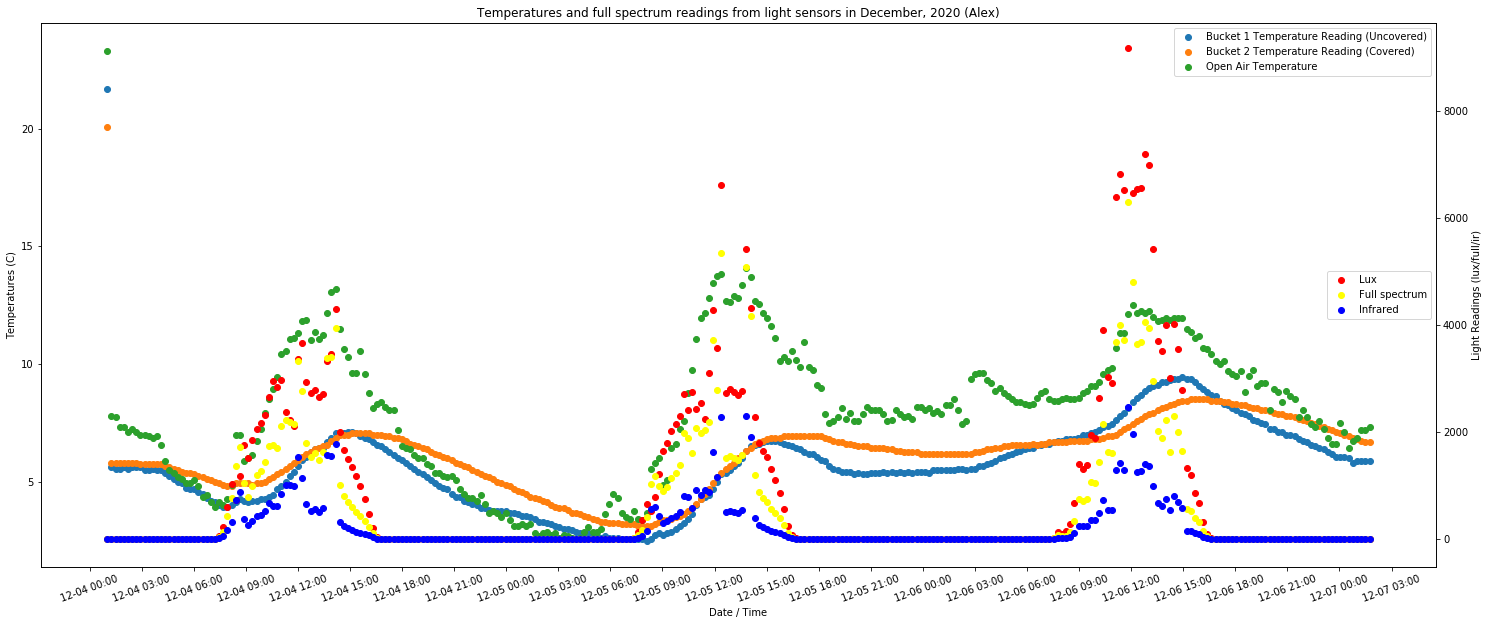

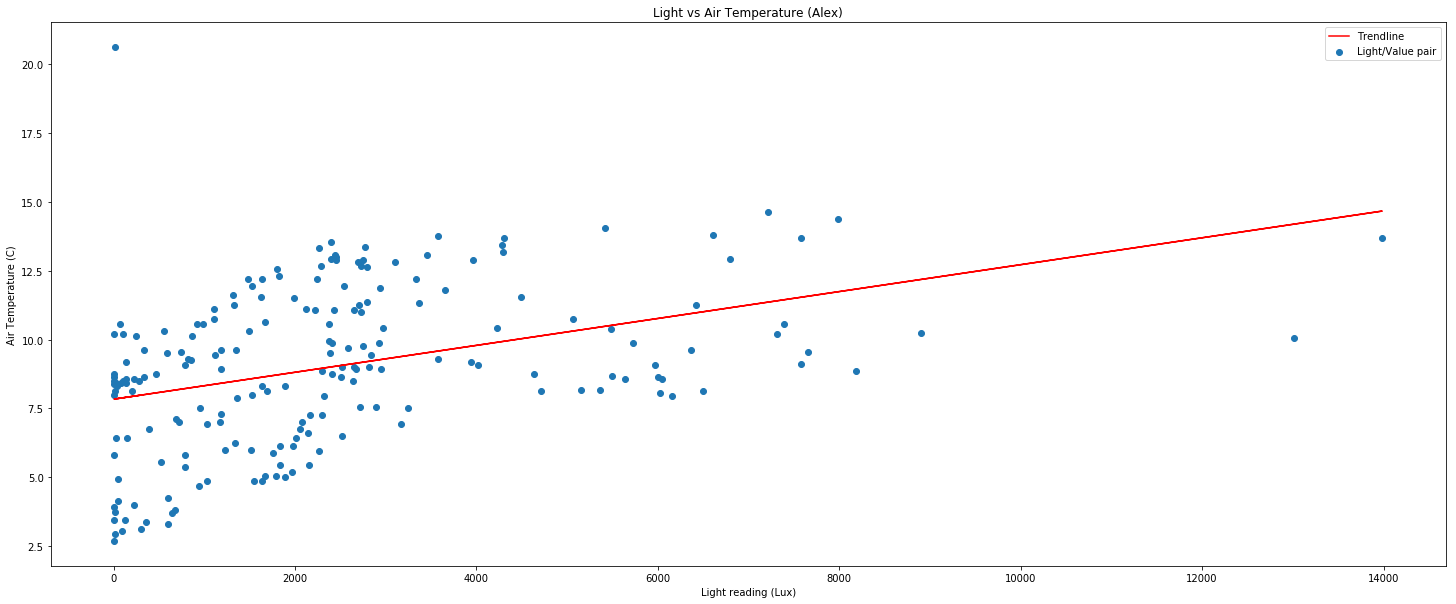

In [203]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

DEFAULT_TIMETICKS = 3

# These are the local file names for me with some explanataions #
ALEX_FILE_NO_SPEC = 'alex-no-full-ir.csv' # my data without the full/ir spectrums (just trimmed them off). 

ALEX_FILE = 'alex.csv' # data that contained only the full/ir spectrums. There's not as much data here as I hoped :(

MARCUS_FILE = 'marcus.csv' # edited to take out metadata (lat: 47.64433 long: -122.325029)

HELENA_FILE = 'helena.csv' # unedited from google drive

CHRISTINA_FILE = 'christina.csv' # edited to take out metadata (lat: 47.6608 long: -122.312, weather: clear/cold)

MAX_FILE = 'max.csv' # edited to take out data where clock reset. It's possible to recover this but I got lazy.

## GRAPHS ##

##### uncomment to look at everyone's air temp! #####
all_temp_time_graph(DEFAULT_TIMETICKS)

##### all three temp sensors vs time. Uncomment for whoever's graph you want! #####
three_temp_graph(ALEX_FILE_NO_SPEC, 'Alex', DEFAULT_TIMETICKS)
# three_temp_graph(MARCUS_FILE, 'Marcus', DEFAULT_TIMETICKS)
# three_temp_graph(HELENA_FILE, 'Helena', DEFAULT_TIMETICKS)
# three_temp_graph(CHRISTINA_FILE, 'Christina', DEFAULT_TIMETICKS)
# three_temp_graph(MAX_FILE, 'Max', DEFAULT_TIMETICKS)

##### All temperatures and light vs time #####
all_temp_light_time(ALEX_FILE_NO_SPEC, 'Alex', DEFAULT_TIMETICKS)
# all_temp_light_time(MARCUS_FILE, 'Marcus', DEFAULT_TIMETICKS)
# all_temp_light_time(HELENA_FILE, 'Helena', DEFAULT_TIMETICKS)
# all_temp_light_time(CHRISTINA_FILE, 'Christina', DEFAULT_TIMETICKS)
# all_temp_light_time(MAX_FILE, 'Max', DEFAULT_TIMETICKS)


# this graph isn't really impressive on its own
##### light sensor vs time. Uncomment like before!!! #####
light_time_graph(ALEX_FILE_NO_SPEC, 'Alex', DEFAULT_TIMETICKS)
# light_time_graph(MARCUS_FILE, 'Marcus', DEFAULT_TIMETICKS)
# light_time_graph(HELENA_FILE, 'Helena', DEFAULT_TIMETICKS)
# light_time_graph(CHRISTINA_FILE, 'Christina', DEFAULT_TIMETICKS)
# light_time_graph(MAX_FILE, 'Max', DEFAULT_TIMETICKS)

##### light + temps vs time graphs. #####
light_temp_time(ALEX_FILE_NO_SPEC, 'Alex', DEFAULT_TIMETICKS)
# light_temp_time(MARCUS_FILE, 'Marcus', DEFAULT_TIMETICKS)
# light_temp_time(HELENA_FILE, 'Helena', DEFAULT_TIMETICKS)
# light_temp_time(CHRISTINA_FILE, 'Christina', DEFAULT_TIMETICKS)
# light_temp_time(MAX_FILE, 'Max', DEFAULT_TIMETICKS)


##### To look at FULL/IR spectrum #####
spec_light_temp_time(DEFAULT_TIMETICKS)

##### TEMP VS LIGHT #####
light_air_temp(ALEX_FILE_NO_SPEC, 'Alex')
# light_air_temp(MARCUS_FILE, 'Marcus')
# light_air_temp(HELENA_FILE, 'Helena')
# light_air_temp(CHRISTINA_FILE, 'Christina')
# light_air_temp(MAX_FILE, 'Max')


In [ ]:
def light_time_graph(csv_name, person_name, hour_ticks):
    
    # Setting up CSV
    csv = pd.read_csv(csv_name, header=None, names=["temp_1_time", "temp_1_reading", "temp_2_time", "temp_2_reading", "temp_3_time", "temp_3_reading", "light_time", "light_reading"])

    # adding the time formatter, I did a lot of googling to make this actually work!
    formatter = mpl.dates.DateFormatter('%m-%d %H:%M')


    # this is the date for light sensor.
    light_dates = [datetime.strptime(d, '%Y-%m-%d-%H-%M-%S') for d in csv["light_time"]]
    x = mpl.dates.date2num(light_dates)

    ## graph!
    fig, ax = plt.subplots(figsize=(25,10))
    ax.scatter(x, csv["light_reading"], color="red")

    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=hour_ticks))
    ax.set(xlabel="Date / Time", ylabel="Light intensity (LUX)", title="Lux variation in early Dec, 2020" + " (" + person_name + ")")

    plt.xticks(rotation=20)
    plt.show()

In [ ]:
def three_temp_graph(csv_name, person_name, hour_ticks):
    
    #creating csv 
    csv = pd.read_csv(csv_name, header=None, names=["temp_1_time", "temp_1_reading", "temp_2_time", "temp_2_reading", "temp_3_time", "temp_3_reading", "light_time", "light_reading"])

    # adding the time formatter, I did a lot of googling to make this actually work!
    formatter = mpl.dates.DateFormatter('%m-%d %H:%M')

    # to set up our axes and figure. 
    fig, ax = plt.subplots(figsize=(25, 10))

    # Setting up the dates for temp sensor #1
    sens_1_dates = [datetime.strptime(d, '%Y-%m-%d-%H-%M-%S') for d in csv["temp_1_time"]]
    x1 = mpl.dates.date2num(sens_1_dates)

    # Setting up dates for temp sensor #2
    sens_2_dates = [datetime.strptime(d, '%Y-%m-%d-%H-%M-%S') for d in csv["temp_2_time"]]
    x2 = mpl.dates.date2num(sens_2_dates)

    # Setting up dates for temp sensor #3
    sens_3_dates = [datetime.strptime(d, '%Y-%m-%d-%H-%M-%S') for d in csv["temp_3_time"]]
    x3 = mpl.dates.date2num(sens_3_dates)

    # Setting up the actual axes!
    ax.scatter(x1, csv["temp_1_reading"])
    ax.scatter(x2, csv["temp_2_reading"])
    ax.scatter(x3, csv["temp_3_reading"])
    ax.set(xlabel="Date / Time", ylabel="Temp (C)", title="Temperature variation in early December " + "(" + person_name + ")")

    # Making the formatter work! And then also letting the graph have an interval of x hours
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=hour_ticks))

    plt.xticks(rotation=20)
    plt.legend(labels=["Bucket 1 Temperature Reading (Uncovered)", "Bucket 2 Temperature Reading (Covered)", "Open Air Temperature"], loc="upper left")
    plt.show()

In [ ]:
def all_temp_time_graph(hour_ticks):
    
    # Setting up CSVs
    alex_csv = pd.read_csv(ALEX_FILE_NO_SPEC, header=None, names=["temp_1_time", "temp_1_reading", "temp_2_time", "temp_2_reading", "temp_3_time", "temp_3_reading", "light_time", "light_reading"])
    
    max_csv = pd.read_csv(MAX_FILE, header=None, names=["temp_1_time", "temp_1_reading", "temp_2_time", "temp_2_reading", "temp_3_time", "temp_3_reading", "light_time", "light_reading"])

    christina_csv = pd.read_csv(CHRISTINA_FILE, header=None, names=["temp_1_time", "temp_1_reading", "temp_2_time", "temp_2_reading", "temp_3_time", "temp_3_reading", "light_time", "light_reading"])
    
    marcus_csv = pd.read_csv(MARCUS_FILE, header=None, names=["temp_1_time", "temp_1_reading", "temp_2_time", "temp_2_reading", "temp_3_time", "temp_3_reading", "light_time", "light_reading"])
    
    helena_csv = pd.read_csv(HELENA_FILE, header=None, names=["temp_1_time", "temp_1_reading", "temp_2_time", "temp_2_reading", "temp_3_time", "temp_3_reading", "light_time", "light_reading"])

    # creating our subplots
    fig, ax = plt.subplots(figsize=(25, 10))
    
    # adding the time formatter, I did a lot of googling to make this actually work!
    formatter = mpl.dates.DateFormatter('%m-%d %H:%M')
    
    # creating the x axis for each csv
    alex_x = date_formatter(alex_csv)
    
    max_x = date_formatter(max_csv)
    
    christina_x = date_formatter(christina_csv)
    
    marcus_x = date_formatter(marcus_csv)
    
    helena_x = date_formatter(helena_csv)
    
    ax.scatter(alex_x, alex_csv["temp_3_reading"])
    ax.scatter(max_x, max_csv["temp_3_reading"])
    ax.scatter(christina_x, christina_csv["temp_3_reading"])
    ax.scatter(marcus_x, marcus_csv["temp_3_reading"])
    ax.scatter(helena_x, helena_csv["temp_3_reading"])    

    
    #set up the axes and formatters!!!
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=hour_ticks))
    
    ax.set(xlabel="Date / Time", ylabel = "Air Temp (C)", title = "Everyone's Air temp values!")
    
    plt.xticks(rotation=20)
    plt.legend(labels=["Alex", "Max", "Christina", "Marcus", "Helena"], loc="upper right")
    plt.show()

In [ ]:
def date_formatter(csv): # this function sucks and isn't useful but I didn't feel like changing anything
    # this is the dates for the csv
    dates = [datetime.strptime(d, '%Y-%m-%d-%H-%M-%S') for d in csv["temp_3_time"]]
    x = mpl.dates.date2num(dates)
    
    return x

In [195]:
def light_temp_time(csv_name, person_name, hour_ticks):
    
    # set up CSV
    csv = pd.read_csv(csv_name, header=None, names=["temp_1_time", "temp_1_reading", "temp_2_time", "temp_2_reading", "temp_3_time", "temp_3_reading", "light_time", "light_reading"])

    # adding the time formatter, I did a lot of googling to make this actually work!
    formatter = mpl.dates.DateFormatter('%m-%d %H:%M')
    
    #create subplots
    fig, ax1 = plt.subplots(figsize=(25, 10))

    sens_3_dates = [datetime.strptime(d, '%Y-%m-%d-%H-%M-%S') for d in csv["temp_3_time"]]
    x = mpl.dates.date2num(sens_3_dates)
    
    ax1.scatter(x, csv["temp_3_reading"])
    plt.xticks(rotation=20)
    ax1.legend(loc="upper right", labels=["Air Temperature"])

    # set up second axis
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    light_sens_dates = [datetime.strptime(d, '%Y-%m-%d-%H-%M-%S') for d in csv["light_time"]]
    x = mpl.dates.date2num(light_sens_dates)
    
    ax2.scatter(x, csv["light_reading"], color="red")
    
    ax1.xaxis.set_major_formatter(formatter)
    ax1.xaxis.set_major_locator(mdates.HourLocator(interval=hour_ticks))
    ax1.set(xlabel="Date / Time", ylabel="Air Temperature (C)", title="Temperature (C) and Light (LUX) readings in early December, 2020 (" + person_name + ")")
    
    ax2.xaxis.set_major_formatter(formatter)
    ax2.xaxis.set_major_locator(mdates.HourLocator(interval=hour_ticks))
    ax2.axes.xaxis.set_visible(False)
    ax2.set(ylabel="Light Reading (LUX)")
    ax2.legend(loc="center right", labels=["Lux"])
    
    plt.show()

In [191]:
def spec_light_temp_time(hour_ticks):
    
    csv = pd.read_csv(ALEX_FILE, header=None, names=["temp_1_time", "temp_1_reading", "temp_2_time", "temp_2_reading", "temp_3_time", "temp_3_reading", "light_time", "light_reading", "full", "ir"])

    # adding the time formatter, I did a lot of googling to make this actually work!
    formatter = mpl.dates.DateFormatter('%m-%d %H:%M')
    
    #create subplots
    fig, ax1 = plt.subplots(figsize=(25, 10))

    # Setting up the dates for temp sensor #1
    sens_1_dates = [datetime.strptime(d, '%Y-%m-%d-%H-%M-%S') for d in csv["temp_1_time"]]
    x1 = mpl.dates.date2num(sens_1_dates)

    # Setting up dates for temp sensor #2
    sens_2_dates = [datetime.strptime(d, '%Y-%m-%d-%H-%M-%S') for d in csv["temp_2_time"]]
    x2 = mpl.dates.date2num(sens_2_dates)

    # Setting up dates for temp sensor #3
    sens_3_dates = [datetime.strptime(d, '%Y-%m-%d-%H-%M-%S') for d in csv["temp_3_time"]]
    x3 = mpl.dates.date2num(sens_3_dates)
    
    ax1.scatter(x1, csv["temp_1_reading"])
    ax1.scatter(x2, csv["temp_2_reading"])
    ax1.scatter(x3, csv["temp_3_reading"])
    plt.xticks(rotation=20)
    ax1.legend(loc="upper right", labels=["Bucket 1 Temperature Reading (Uncovered)", "Bucket 2 Temperature Reading (Covered)", "Open Air Temperature"])

    # set up second axis
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    light_sens_dates = [datetime.strptime(d, '%Y-%m-%d-%H-%M-%S') for d in csv["light_time"]]
    x4 = mpl.dates.date2num(light_sens_dates)
    
    light_sens_dates = [datetime.strptime(d, '%Y-%m-%d-%H-%M-%S') for d in csv["light_time"]]
    x5 = mpl.dates.date2num(light_sens_dates)
    
    light_sens_dates = [datetime.strptime(d, '%Y-%m-%d-%H-%M-%S') for d in csv["light_time"]]
    x6 = mpl.dates.date2num(light_sens_dates)
    
    ax2.scatter(x4, csv["light_reading"], color="red")
    ax2.scatter(x5, csv["full"], color="yellow")
    ax2.scatter(x6, csv["ir"], color="blue")
    
    ax1.xaxis.set_major_formatter(formatter)
    ax1.xaxis.set_major_locator(mdates.HourLocator(interval=hour_ticks))
    ax1.set(xlabel="Date / Time", ylabel="Temperatures (C)", title="Temperatures and full spectrum readings from light sensors in December, 2020 (Alex)")
    
    ax2.xaxis.set_major_formatter(formatter)
    ax2.xaxis.set_major_locator(mdates.HourLocator(interval=hour_ticks))
    ax2.axes.xaxis.set_visible(False)
    ax2.set(ylabel="Light Readings (lux/full/ir)")
    ax2.legend(loc="center right", labels=["Lux", "Full spectrum", "Infrared"])
    
    plt.show()
    

In [185]:
def light_air_temp(csv_name, person_name):
    csv = pd.read_csv(csv_name, header=None, names=["temp_1_time", "temp_1_reading", "temp_2_time", "temp_2_reading", "temp_3_time", "temp_3_reading", "light_time", "light_reading"])
    csv_no_zero = csv[csv["light_reading"] > 1]
    
    x = csv_no_zero["light_reading"]
    y = csv_no_zero["temp_3_reading"]
    
    #create subplots
    fig, ax = plt.subplots(figsize=(25, 10))
    
    ax.scatter(x, y)
    
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x,p(x), color="red")
    
    ax.set(xlabel="Light reading (Lux)", ylabel="Air Temperature (C)", title="Light vs Air Temperature (" + person_name + ")")
    ax.legend(labels=["Trendline", "Light/Value pair"])
    plt.show()

In [200]:
def all_temp_light_time(csv_name, person_name, hour_ticks):
    
    # set up CSV
    csv = pd.read_csv(csv_name, header=None, names=["temp_1_time", "temp_1_reading", "temp_2_time", "temp_2_reading", "temp_3_time", "temp_3_reading", "light_time", "light_reading"])

    # adding the time formatter, I did a lot of googling to make this actually work!
    formatter = mpl.dates.DateFormatter('%m-%d %H:%M')
    
    #create subplots
    fig, ax1 = plt.subplots(figsize=(25, 10))

    # Setting up the dates for temp sensor #1
    sens_1_dates = [datetime.strptime(d, '%Y-%m-%d-%H-%M-%S') for d in csv["temp_1_time"]]
    x1 = mpl.dates.date2num(sens_1_dates)

    # Setting up dates for temp sensor #2
    sens_2_dates = [datetime.strptime(d, '%Y-%m-%d-%H-%M-%S') for d in csv["temp_2_time"]]
    x2 = mpl.dates.date2num(sens_2_dates)

    # Setting up dates for temp sensor #3
    sens_3_dates = [datetime.strptime(d, '%Y-%m-%d-%H-%M-%S') for d in csv["temp_3_time"]]
    x3 = mpl.dates.date2num(sens_3_dates)
    
    ax1.scatter(x1, csv["temp_1_reading"])
    ax1.scatter(x2, csv["temp_2_reading"])
    ax1.scatter(x3, csv["temp_3_reading"])
    plt.xticks(rotation=20)
    ax1.legend(loc="upper right", labels=["Bucket 1 Temperature Reading (Uncovered)", "Bucket 2 Temperature Reading (Covered)", "Open Air Temperature"])

    # set up second axis
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    light_sens_dates = [datetime.strptime(d, '%Y-%m-%d-%H-%M-%S') for d in csv["light_time"]]
    x = mpl.dates.date2num(light_sens_dates)
    
    ax2.scatter(x, csv["light_reading"], color="red")
    
    ax1.xaxis.set_major_formatter(formatter)
    ax1.xaxis.set_major_locator(mdates.HourLocator(interval=hour_ticks))
    ax1.set(xlabel="Date / Time", ylabel="Air Temperature (C)", title="Temperature (C) and Light (LUX) readings in early December, 2020 (" + person_name + ")")
    
    ax2.xaxis.set_major_formatter(formatter)
    ax2.xaxis.set_major_locator(mdates.HourLocator(interval=hour_ticks))
    ax2.axes.xaxis.set_visible(False)
    ax2.set(ylabel="Light Reading (LUX)")
    ax2.legend(loc="center right", labels=["Lux"])
    
    plt.show()